# Exploring Spotify Songs from 1921-2020

## Introduction

Music plays a central role in American culture. The past century of American music is punctuated by decades of unique musical genres, ranging from Pop to Jazz to Hip Hop. Music is often a larger representation of ongoing political and social movements. For example, the proliferation of Rock & Roll music in the 50s was a reflection of a larger social upheaval of traditional norms and values in the United States -- children of the postwar baby boom were drawn towards Elvis Presley's eccentricity and rebellious nature. The production and dissmeniation of these new kinds of music over the past decade would not have been possible without the emergence of technologies like the Turntable, the MP3 player, or the iPod. The affordances of each technology have influenced the kinds of music artists are able to create and also expanded their audience dramatically. With increased access to music, competition among artists has drastically increased. The desire and need to create a "hit" song has become critical to one artist's success over another. Research shows that our attention spans have signifigantly dropped since the emergence of new digital technologies. Knowing this, new applications like Tik-Tok have capitalized on short, attention-grabbing videos paired with songs. Our research is looking to explore how the duration of songs and other key music qualities have changed over the past 80 years with the introduction of new music technologies. We specifically were interested in considering if the duration of songs has meaninfully decreased over the past 80 years as artists have potentially become more focused on creating short "hits." We also would like to analyze how new genres and decades have changed the danceability, tempo, and popularity of music. 

Main Findings:

- Over the periods of 1960-2020, average song duration decreased. We can support this finding by looking at the slope coorelation of -6.84 over the years of 1960 to 2020. Additionally, this downward trend supports our inital hypothesis that song duration has decreased over time as artists focus more on producing "hits" instead of longer, more flushed out pieces of work. 

- There is not a strong linear coorelation however between the year a song is released and the duration of the song. Even though the overall avg of song duration decreased over 40 years, when we performed a linear regression on song duration and year, we recieved a r squared of 0.000002 or approximately 0. This finding communicates to us that the independent variable(year) cannot be predicted by the depedent variable(duration). To further support this claim when we performed a multi-variable analysis using danceability, duration, energy, and tempo to predict the year a song was released, we recived a prediction accuracy rating of 1.2%. This low prediction accuracy score leads us to believe that year is not strongly coorelated to the unique attributes found in each indivdually song. 

- Danceability has seen peaks in the late 1960s, the 1980s, and the late 1990s. To elaborate, danceability describes how 'suitable' a song is for dancing and is determined by the tempo, rhythm, and beat strength. The danceability is determined on a scale of 0.0 to 1.0 and is one of Spotify's audio metrics that they use to suggest/organize music. This is interesting because each one of these peaks cooresponds to a notably popular genre of music: 1960s- rock n roll, 1980s - dance music, 1990s/early 2000s - Rock + Rap.


Summary of results:

Song duration has decreased over the past 40 years after analyzing a dataset of over 120,000 spotify songs. In addition, as song duration has decreased, danceability of songs has marginally increased over the past 40 years. However, there is not a strong linear relationship between year, duration and danceability thus far in our analysis - demonstrated by r squared scores close to 0 in our linear regression models of 'years vs duration' and 'year vs danceability'.




## Data description 

The data we have collected analyzes the audio features of approximately 170,000 songs from Spotify Web API released between 1921 and 2020, and we downloaded it off of Kaggle. The data was aggregated by a self-taught data scientist and music enthusiast by the name of Yamac Eren Ay. He created this dataset because he wanted to do some scientific research using Spotify data, but he could not find an updated and relevant dataset publicly available. He has kindly provided his aggregagated dataset to the public via Kaggle. The data exists in five different datasets: data.csv, data_by_artist.csv, data_by_genres.csv, data_by_year.csv, and data_w_genres. Data.csv is the original data file and contains approximately 170k songs, the other files are created using a groupby aggragate operation grouping by release year, genres of songs, and artists. Each song or track in the dataset is analyzed for a number of different variables including:

<b> Primary: </b>

- id (the identification of the track generated by spotify)

<b> Numerical </b>
- Acousticness (Ranges from 0 to 1): How much of the track that is acoustic
- Danceability (Ranges from 0 to 1): How danceable the track is
- Energy (Ranges from 0 to 1): the energy of the track
- Duration_ms (Integer typically ranging from 200k to 300k): the length of the track in miliseconds 
- Instrumentalness: How much of the song is instrumental without vocals
- Popularity(Ranges from 0 to 1): 
- Tempo(Float typically ranging from 50 to 150)
- Liveness (ranges from 0 to 1)
- Loudness (Float tpyically rnaging from -60 to 0)
- Speechiness (Ranges from 0 to 1)
- Year(Ranges from 1921 to 2020)

<b> Categorical </b>
- Key (All keys on actave encoded as values ranging from 0 to 11)
- Artists(list of artists mentioned)
- Release_Date(Date of release mostly in yyyy-mm-dd format)
- Name (Name of Song)

However, for our project we limited the variables to danceability, duration_ms, energy, popularity, tempo and year since we thought these were the most credible metrics from our dataset. In addition, we also limited the range of the data.csv main file to 1960-2020 instead of 1921-2020. We limited the variables because we found some of the variables like liveness, loudness, speechiness to be less relevant and distracting from other variables in the dataset, and we were able to cut out 40,000 songs from pre-1960 which we thought would still exhibit enough time to demonstrate a trend and make the data easier to comprehend. We don't believe there to be any confidential or threatening data that could cause any individual harm.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#  Saving raw data .csv files to variables

raw_year_data = pd.read_csv("data_by_year.csv")
raw_genre_data = pd.read_csv("data_by_genres.csv")
raw_artist_data = pd.read_csv("data_by_artist.csv")
raw_total_data = pd.read_csv("data.csv")

#Keeping Relevant Columns and saving in new variables

new_year_data = raw_year_data[['year','danceability', 'duration_ms','instrumentalness','liveness','loudness','tempo','valence','popularity']]
new_genre_data = raw_genre_data[['genres','danceability', 'duration_ms','instrumentalness','liveness','loudness','tempo','valence','popularity']]
new_artist_data = raw_artist_data[['artists','danceability', 'duration_ms','instrumentalness','liveness','loudness','tempo','popularity']]
raw_total_data = raw_total_data[['artists','danceability','duration_ms','energy','popularity','tempo','year' ]]

#Cleaning Artist Data by dropping duplicates and removing artist names that aren't english

new_artist_data.drop_duplicates()
new_artist_data.iloc[0:27261] #removed artists with names that aren't English

#Cleaning Genre Data
new_genre_data.iloc[2:] #removing first two non-sensiscal rows

#Dropping unwanted columns and creating new dataframes with years beginning in 1960
new_data = raw_total_data.copy()
new_year = new_year_data.copy()
new_data = new_data[new_data['year'] > 1959]
new_year = new_year[new_year['year'] > 1959]

#Grouping data by year and averaging the duration and tempo of all the songs released in that year
duration_year = new_data.groupby(["year"])['duration_ms','tempo'].mean()
df_year = pd.DataFrame(duration_year)
#print(df_year)

#Renaming columns in new dataframe
df_year.rename(columns={"duration_ms":"Avg_Dur_ms"})

#Creating new data frame with innovative technologies by Year
new_technologies = pd.DataFrame( {"year" : [1925, 1928, 1931, 1935, 1937, 1940, 1954, 1962, 1963, 1965, 1972, 1979, 1982, 1986, 1989, 1991, 1995, 1997, 2001, 2004, 2007],
                                 "innovation" : ['Victor Orthophonic Victrola Phonograph', 'Magnetic Tape', 'The LP', 'AEG Magnetophon Tape Recorder', 'Bell Labs Two-Channel Stereo', 'The Vocoder',
                                                'Regency TR-1 Transistor Radio', 'JTM45 Amplifier', 'Phillips Compact Cassette Tape', '8-Track Tape', 'Technics SL-1200 Turntables',
                                                'The Walkman', 'Commercial Compact Disc', 'Akai S900 Sampler', 'The World Wide Web', 'Pro Tools', 'The MP3', 'Auto-Tune', 'iPod', 'GarageBand', 'SoundCloud']
                                 })


<ipython-input-10-229b8b6b09fe>:35: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  duration_year = new_data.groupby(["year"])['duration_ms','tempo'].mean()


<b> Here is the few first rows of the data.csv dataset adjusted to the specific attributes we were looking for and the total number of rows. </b>

In [11]:
print('Number of rows in dataset: ' + str(len(new_data.index)))
new_data.head()

Number of rows in dataset: 121656


,artists,danceability,duration_ms,energy,popularity,tempo,year
2054,['Sam Cooke'],0.332,171320,0.394,12,106.138,1960
2055,"['John Hughes', 'Frank Asper', 'Mormon Taberna...",0.311,130960,0.105,13,90.104,1960
2056,['Frankie Avalon'],0.474,117093,0.220,13,98.988,1960
2057,['The Everly Brothers'],0.623,152667,0.333,14,111.085,1960
2058,"['John Bacchus Dykes', 'Mormon Tabernacle Choi...",0.191,226067,0.138,13,77.495,1960


<b> Here is the first few rows of the dataset grouped by release year and total number of rows. </b>


In [12]:
print('Number of rows in dataset: ' + str(len(new_year.index)))
new_year.head()

Number of rows in dataset: 61


,year,danceability,duration_ms,instrumentalness,liveness,loudness,tempo,valence,popularity
39,1960,0.487343,211600.6325,0.178411,0.204116,-13.777596,112.965354,0.527879,18.4845
40,1961,0.489204,230635.9715,0.260177,0.210878,-14.158903,112.306390,0.518212,18.2335
41,1962,0.499203,210347.9275,0.173528,0.206890,-13.055856,114.924049,0.560297,20.3360
42,1963,0.486331,200297.1395,0.190614,0.203516,-13.602048,114.546598,0.549899,24.3650
43,1964,0.506586,197745.7025,0.155721,0.220217,-13.020535,115.038635,0.567548,25.1475


<b> Here is the first few rows of data.csv grouped by artist and total number of rows in the dataset. </b>

In [13]:
print('Number of rows in dataset: ' + str(len(new_artist_data.index)))
new_artist_data.head()

Number of rows in dataset: 27621


,artists,danceability,duration_ms,instrumentalness,liveness,loudness,tempo,popularity
0,"""Cats"" 1981 Original London Cast",0.442750,247260.000000,0.022717,0.287708,-14.205417,115.983500,38.000000
1,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.081158,0.315215,-10.690000,103.044154,33.076923
2,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.024593,0.325786,-15.230714,77.375857,34.285714
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.073587,0.275481,-15.639370,88.667630,34.444444
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.437333,232428.111111,0.037534,0.216111,-11.447222,120.329667,42.555556


<b> Here is the first few rows of the data.csv file grouped by genre and the total number of rows in the dataset. </b>

In [14]:
print('Number of rows in dataset: ' + str(len(new_genre_data.index)))
new_genre_data.head()

Number of rows in dataset: 2664


,genres,danceability,duration_ms,instrumentalness,liveness,loudness,tempo,valence,popularity
0,432hz,0.299333,1.048887e+06,0.477762,0.131000,-16.854000,120.285667,0.221750,52.166667
1,[],0.521473,2.298526e+05,0.196737,0.221586,-12.679076,112.025168,0.515920,21.682005
2,a cappella,0.577017,1.936522e+05,0.003799,0.127087,-12.770211,111.813230,0.453186,43.351819
3,abstract,0.459500,3.430185e+05,0.791400,0.119480,-14.092000,124.743200,0.304990,41.500000
4,abstract beats,0.694400,2.338244e+05,0.349403,0.102453,-6.699800,119.398400,0.634187,58.600000


<b> Additional Data Sets Used </b>

We manually created a data set of new innovative technologies over the past century. The year that the innovations were released was found online. This data set can come in handy when we are trying to look at trends in our data like song duration that could be coorelated to the rise of new technology like the ipod. 

<b> Here are the first few rows of this dataset</b>

In [15]:
new_technologies.head()

,year,innovation
0,1925,Victor Orthophonic Victrola Phonograph
1,1928,Magnetic Tape
2,1931,The LP
3,1935,AEG Magnetophon Tape Recorder
4,1937,Bell Labs Two-Channel Stereo


## Preregistration Statements

**Analysis 1:**


We want to perform a Linear Regression on song duration and year. We want to calculate the correlation coefficent of song duration and year to see if year is a good predictive indicator of song duration. The correlation coefficent value would help us explore our research question exploring whether or not song duration has decreased over time, especially with the emergence of new media technologies. We also want to compare the r-squared value between song duration and year to see if song duration is dependent upon year. We think that this analysis will be interesting to our project because we are interested in how the advent and emergence of new media technologies may have influenced song duration over time. If a high r-squared value exists between song duration and year, this will suggest that there is a strong linear relationship between song duration and year. 


**Analysis 2:**


Based on the tempo, duration, and danceability of a song, we want to perform a multivariable linear regression to predict year. We are interested in whether or not tempo, duration, and danceability have any relationship to the year a song was released. This is important to us because if tempo, duration, and danceability are accurate predictors of year, this will help us understand our research question that hopes to explore how qualities of songs have changed over time with the introduction of new technologies and other key events in music history. For example, in the last decade with the emergence of new technologies like Tik-Tok, high-tempo, high danceability songs have emerged, and we want to be be able to make the claim that there is a relationship between the existence of these technologies and the qualities of songs. In order to do so, we must prove that key traits like tempo, duration, danceability  have clear trends over time. Whether or not these trends are linear or not will point us in the right direction to finding which qualities do follow certain trends. For example, in HW6 we used carat, cut, and clarity to predict diamond price, and we're interested in whether or not our data provide us with similar insights using a multivariable analysis. Hopefully our results will allow us to qualitatively analyze rising trends in new genres and media technologies. 

## Exploratory data analysis

Our initial data exploration has shown intersecting trends in song duration, popularity, and danceability. We primarily looked at data.csv and the dataset grouped by year in our data analysis, but we hope to be able to integrate how genre has changed over time as well into our analysis. Additionally, we are going to integrate our dataset that shows innovative technologies over time with our existing sets to demonstrate more coorelation. Below you will find the different graphs we were able to create looking primarily at the two data sets: data.csv and new_year(data.csv grouped by year)

<ins> <b> Graphs for grouped by year dataset </b></ins>

<b> Song Duration Over Time </b>

Our quick analysis shows us that in the last decade song duration initially showed a pretty strong trend in increasing song duration, however in the last decade this trend has taken a sharp decline. We found the correlation between the two variables as well which is basically zero, demonstrating there has been a sharp decline in the last decade.

             duration_ms      year
duration_ms     1.000000 -0.001124
year           -0.001124  1.000000


Text(0, 0.5, 'duration_ms')

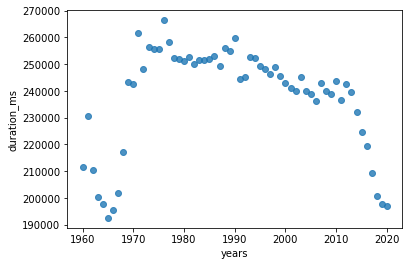

In [32]:
time_year = new_data[['duration_ms','year']]

print(time_year.corr(method='pearson'))

plt.scatter(new_year['year'], new_year['duration_ms'], alpha=0.8)
plt.xlabel('years')
plt.ylabel("duration_ms")

#linear regression between duration and time


<b> Popularity Over Time </b>

Additionally, our data demonstrates that since 1960 songs have gained in popularity until 2020 there has been a drop off. Popularity is defined as the number of people listening to the same songs. Similar to duration of songs, 2020 marks a decrease in both duration of songs and popularity.

The strong correlation between year and music popularity shows us that over the past 80 years listeners are listening to more and more of the same tracks. This has led to songs that are considered “popular” or “hits” receiving more attention and plays than songs that were also “popular” in earlier decades.

                year  popularity
year        1.000000    0.734389
popularity  0.734389    1.000000


Text(0, 0.5, 'popularity')

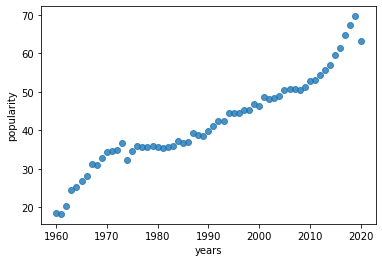

In [19]:
year_popularity = new_data[['year', 'popularity']]

print(year_popularity.corr(method='pearson'))

plt.scatter(new_year['year'], new_year['popularity'], alpha=0.8)
plt.xlabel('years')
plt.ylabel("popularity")

<b> Danceability Over Time </b>

Similar to our graph representing popularity of songs since 1960, danceability follows a similar trend that is increasing up and to the right. Each year danceability seems to increase and has experienced 3 current peaks before the current position on the graph: one peak in the 1980s, again in the late 1990s, and now in 2020.

There appears to be a relatively weak correlation between year and danceability. As the graph shows, certain decades appear to have peaks of danceability before dropping. We likely believe this is due to the popularity and evolution of certain genres of music, for example pop dance music in the years between 2010-2020. Additionally, 1970-1980 shows a strong increase in danceability, likely due to the popularity of disco, funk, and rock n roll genre. 

                  year  danceability
year          1.000000      0.209173
danceability  0.209173      1.000000


Text(0, 0.5, 'danceability')

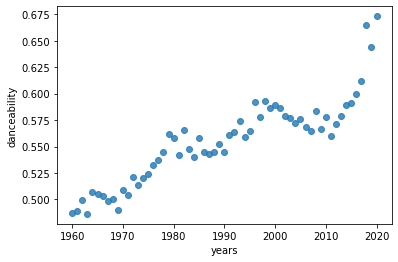

In [20]:
year_dance = new_data[['year', 'danceability']]

print(year_dance.corr(method='pearson'))

plt.scatter(new_year['year'], new_year['danceability'], alpha=0.8)
plt.xlabel('years')
plt.ylabel("danceability")

The slope is: 0.0020604625224978565
The intercept is: -3.5450803698240887
the r squared value is: 0.043753284456910735


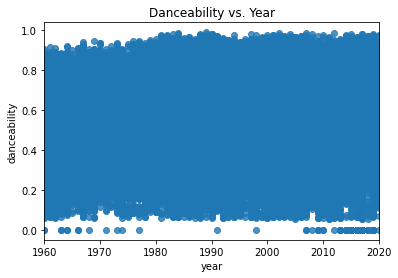

In [34]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

X = new_data[['year']]
Y = new_data['danceability']

Predict = LinearRegression().fit(X, Y)

Slope = Predict.coef_[0]
Intercept = Predict.intercept_

print('The slope is:', Slope)
print('The intercept is:', Intercept)

sns.regplot(X, Y, data=new_data).set_title('Danceability vs. Year')

Rsquared = Predict.score(X, Y)
print('the r squared value is:', Rsquared)


<b> Tempo Over Time </b>

The tempo of music also appears to have an incredibly weak correlation, however our scatter plot shows interesting patterns within certain time periods. For example, we hope to explore if the decrease in tempo between 1980-2000 is due to the proliferation of R&B and hip hop, which tends to have slower tempos compared to the high tempos of Disco and Rock n Roll music.

In [49]:
df_year.corr(method='pearson')

,duration_ms,tempo
duration_ms,1.000000,0.466095
tempo,0.466095,1.000000


Text(0, 0.5, 'tempo')

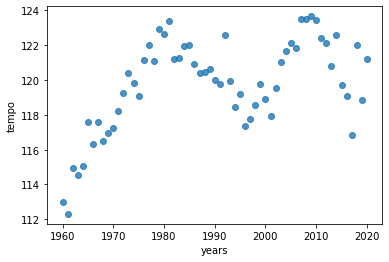

In [21]:
year_tempo = new_data[['year', 'tempo']]

plt.scatter(new_year['year'], new_year['tempo'], alpha=0.8)
plt.xlabel('years')
plt.ylabel("tempo")

<b> # of Songs With Length x In milliseconds </b>

This graph demonstrates the frequency of songs that have specific lengths in milliseconds. You can see from this graph that the majority of songs hover around the millisecond range from 230000 to approximately 260000 - which is about 4 minutes long.  

Text(0, 0.5, 'Count of Songs Grouped by Year')

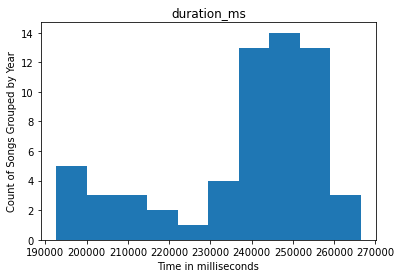

In [35]:
new_year.hist(column='duration_ms', grid=False)
plt.xlabel("Time in milliseconds")
plt.ylabel("Count of Songs Grouped by Year")

<b> Histogram of different attributes in new_year data set </b>

This is a grouping of each column in the new_year data set broken up into histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef2104e070>,
      dtype=object)

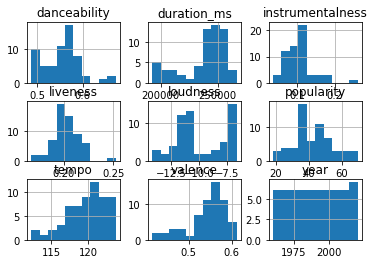

In [44]:
new_year.hist()

<ins><b> Graphs for Data.csv Data Set </b></ins>

<b> Bar Chart of Duration Over Time </b>

Bar Chart demonstrating the coorelation between duration of songs and release data from the years 1960 to 2020. It is clear that the duration of songs increased over time and then sharply decreased from the mid 2000's to now. 

Text(0, 0.5, 'Duration in Milliseconds')

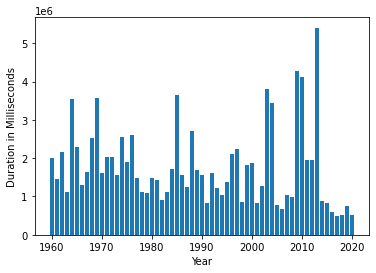

In [122]:
plt.bar(x=new_data['year'], height=new_data['duration_ms'], align='center')
plt.xlabel('Year')
plt.ylabel('Duration in Milliseconds')

<b> Histogram of Danceability and Count </b>

This chart demonstrates the frequency of songs that have certain danceability levels. We can see that most of the songs in our larger data.csv dataset have the danceability level of around .5 - .6. This means that since danceability is a trend that has been increasing over time, the majority of the songs that have high danceability are from a more recent timeframe.

Text(0, 0.5, 'Count')

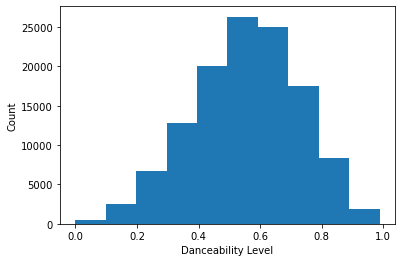

In [125]:
plt.hist(x=new_data['danceability'])
plt.xlabel('Danceability Level')
plt.ylabel('Count')

<b> Frequency of Songs that have a certain tempo </b>

You can see from this data set that most songs have a tempo of about 100 beats per minute the smallest portion of songs have a tempo of less than 50 beats per minute.

Text(0, 0.5, 'Count')

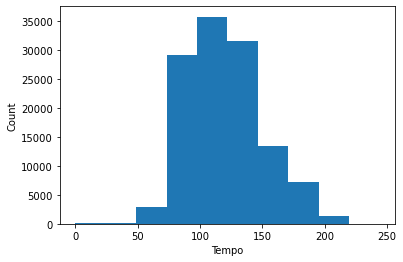

In [126]:
plt.hist(x=new_data['tempo'])
plt.xlabel('Tempo')
plt.ylabel('Count')

<b> Frequency of songs that have a specific popularity level </b>

This chart demonstrates that the majority of songs have a popularity level of about 45. The popularity level is defined as the number of people that listen to songs more than once.

Text(0, 0.5, 'Song Count')

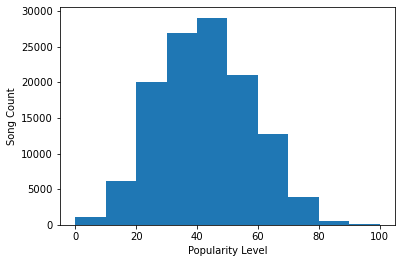

In [127]:
plt.hist(x=new_data['popularity'])
plt.xlabel('Popularity Level')
plt.ylabel('Song Count')

**Preregistration Statement 1**

Below we ran a regression on the duration of songs against release year. As stated above, we hoped to see if there was a linear relationship between song duration and year. Specifically, we expected song duration to decrease as year increased. 

The slope is: -6.844512811067015
The intercept is: 251641.08427274614
the r squared value is: 1.262296592252632e-06


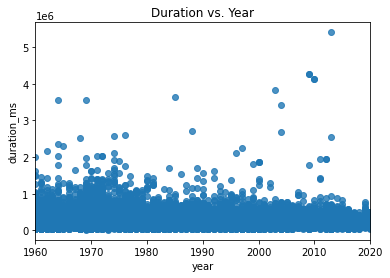

In [27]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

x = new_data[['year']]
y = new_data['duration_ms']

predict = LinearRegression().fit(x, y)

slope = predict.coef_[0]
intercept = predict.intercept_

print('The slope is:', slope)
print('The intercept is:', intercept)

sns.regplot(x, y, data=new_data).set_title('Duration vs. Year')

rsquared = predict.score(x, y)
print('the r squared value is:', rsquared)

Our slope of -6.84 shows that between 1960 and 2020, song duration decreased. This downward trend supports our inital hypothesis that song duration has decreased over time as artists focus more on producing "hits" instead of longer, more flushed out pieces of work. However, our incredibly small r squared value close to 0 shows that there is not a strong linear relationship between song duration and year. This leads us to believe that a linear regression may not be the best model to compare song duration against year.

**Preregistration Statement 2**

Below we analyzed our second preregistration statement. In this analysis we were looking to see if we could use danceability, duration, energy, and tempo to predict the year a song was released. 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#Using a multivariable linear regression to see how danceability, duration, energy, and tempo are able to predict year
xfit = new_data[['danceability', 'duration_ms', 'energy', 'tempo']]
yfit = new_data['year']

multiregression = LinearRegression().fit(xfit, yfit)
print('The coefficients of the input variables are {}'.format(multiregression.coef_))

#Using a logistic regression to see if we can successfully use these inputs to predict the year a song was made
spot_train, spot_test = train_test_split(new_data, test_size=.9, random_state=15)
multiregression = LogisticRegression().fit(spot_train[['danceability', 'duration_ms', 'energy', 'tempo']], spot_train['year'])

correct = sum(spot_test['year'] == multiregression.predict(spot_test[['danceability', 'duration_ms', 'energy', 'tempo']]))
total = len(spot_test)
print("The prediction accuracy using the test set is: {:.1f}%".format(correct/total*100))

The coefficients of the input variables are [1.73242477e+01 2.40863174e-06 1.79050969e+01 5.75777627e-03]
The prediction accuracy using the test set is: 1.6%


Our prediction accuracy of 1.6% shows that it was incredibly difficult for us to predict the release year of a song based on danceability, duration, energy, and tempo. We are not completely surprised by this because the difference between a song released in 1988 and 1989 may be very minimal, however if our model does not predict the year exactly, our model marks that as a failure. This may not be the most effective prediction method since songs produced within the same decade are generally similar -- and we want a model that is able to reflect that with its predictions.

## Interpretations and Conclusions

We discovered through the course of our data analysis that song duration over the past 40 years has decreased. However, we are not confident that there is a linear relationship that exists between song duration and year. We are not confident because when we performed a linear regression on song duration vs year the r squared value that was returned was 1.262296592252632e-06, which is very close to 0. This r squared value tells us that year alone is not a good predictor for song duration. In addition, even when we added the variables danceability, duration, energy , and tempo in order to see if there was a coorelation between these variables of a song and the year it was released - we recieved a prediction accuracy score of close to 1%. This further supports the finding that year is not linearly coorelated between variables of songs over the time period of 1960s-2020. When looking at these results it makes sense
that year isn't coorelation to duration of songs as much as we thought. Initially, we were trying to use year as a placeholder variable that existed within our dataset to demonstrate the rise of new technologies over time. For example, by using years from 1980s-2020 we can account for changes in song duration over a 40 year span where new technolgies were obviously introduced. However, through our results its clear that year as a standalone variable does not provide enough context to the relationship that we are trying to demonstrate. If we were to compare average amount of money artists make per song vs song duration over time, this would be a more accurate predictor that we can run linear regression on - and ideally, also be able to compare the means of random subsets of each dataframe. 

However, the reason that year might not be a good variable to predict duration of songs is becuase there are other outside factors that have influenced duration of music over time: such as straming. In a real world context, this decrease can be attributed to the rise of the streaming service economic model. Artists get paid between 0.004 and 0.008 cents for every stream that their song recieves on a streaming platform. This model, compared to the model demonstrated with CD's and vinyl, disincentivizes artists to make longer individual songs. For example, in the age of CD and Vinyl an artist was incentivized to make the best songs in order to promote the sales of their physical records, they didn't make money off of individual songs. There are external theories claiming that as people's attention spans lower, artists are making songs that are more danceable and shorter, in order to appeal to the modern consumer. Through our data we discovered that danceability has increased over time as duration of songs has decreased - which gives us a fair amount of confidence that this theory could prove to be true.




## Data limitations 

- Some constraints that exist within our datasets include our inability to compare genres over many years. Our original huge dataset grouped songs by artist and release date, but not by genre. As a result, it was difficult to compare genre data over a set of years. 

- Even though Spotify has one of the largest song catalogs in the world, our dataset is only music that is taken from the Spotify API which could potentially result in our data missing out on a range of other songs that have different durations, tempo, danceability during the time frame we are looking at. These other songs could have been on radio, on apple music, Napstr, itunes, or a number of other music catalogs that existed during this timeframe.

- One of the main data sets we are looking at is new_year.csv, which is all of the songs grouped by release year. This dataset is beneficial because we are able to use it to demonstrate trends over a period of time. However, because it is grouped by year, the dataset is not as large as the other ones and is only 100 rows long, not counting the 40 rows that were removed when we shortened our data to every song after 1960. This is limiting because its a much smaller dataset than the other ones that we have but it is the only one that is organized by release year - so we need to use it, but we might lose some credibility in our analysis because of the limitations of timeframe in years as a variable.

- We did not have control over the initial collection and analysis of the data, so we are unable to say with 100% certainty that the attributes each song is analyzed for like danceability, instrumentalness, liveness, and 	popularity are legitimate metrics. We know that the data was collected directly from Spotify's API and understand the definitions of each attribute, but the original data scientist who gathered the data could have taken some creative liberty that was not accounted for on kaggle. For example, when looking specifically at popularity, the idea is that popularity is ranked by the amount of people that have listened to a song, but it is impossible to know fully that this metric is accurate given that our data is primarily from the Spotify API. There could be a lot of other people that are not accounted for that have listened to the song which could impact the trends we find in our data. Additionally, songs that have a much longer duration could have been changed when going from radio to a streaming service like spotify, which might not want to play music like the Grateful Dead that can go on for hours.


## Source Code

Our github repository can be found at the following link: https://github.com/pem94/info2950_group_project

Our repository contains all of our project code, work from each different phase, and the initial dataset we used to perform our analyses.

## Acknowledgements

We would like to thank Yamac Eren Ay for compiling this dataset. We would also like to give a special thanks to Spotify Developers for documenting Spotify Web API. 

We would also like to thank our TAs for all of the feedback they have given us throughout the different phases. Their feedback and commentary has been critical to helping us understand our data better and determinew which aspects of our data we could explore in greater depth. Additionally, we appreciate the feedback our peers have given us.


Sources:

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv

https://www.rollingstone.com/feature/the-50s-a-decade-of-music-that-changed-the-world-229924/

https://time.com/3858309/attention-spans-goldfish/


## Questions for reviewers



- We discovered a data set that includes revenue statistiics of the Music Indsutry over the past 40 years, and in this data set there are columns for 'year' as well as 'format'. The 'format' relates to the medium that was available in that specific year(CD,record player,vinyl,streaming,ipod), and we are looking for a way to merge these datasets to hopefully try to identify a variable that has a linear relationship with duration. Do you have any suggestions for ways we can merge these datsets?

- Additionally, we also found that the year column in our current dataset is not a good predictor for duration of song. We are thinking about looking at revenue, or something more specific where we can perform a ttest, do you have any suggestions for additional variables that we could put into our model (mobile phone use, adoption of digital devices,etc.)